In [ ]:
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

In [1]:
%pip install python-chess
%pip install import_ipynb
%pip install numpy

import chess
import json
import pprint
import numpy as np
from typing import Callable

import import_ipynb
import Game
from Globals import Globals
from MinimaxAlgorithm import make_move_minimax, make_move_minimax_memoization
from RandomAlgorithm import make_random_move
from AlphaBetaAlgorithm import make_move_alphabeta, make_move_alphabeta_progressive_deepening

     |████████████████████████████████| 147 kB 13.4 MB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=241bc926e28114081d8fcecd10d77ba98818e70064cdcb495d4c7cee43ad8ba5
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
importing Jupyter notebook from Game.ipynb


importing Jupyter notebook from Globals.ipynb


importing Jupyter notebook from MinimaxAlgorithm.ipynb


importing Jupyter notebook from Util.ipynb


importing Jupyter notebook from RandomAlgorithm.ipynb


importing Jupyter notebook from AlphaBetaAlgorithm.ipynb


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In general, a game of chess can be initialized through the instance of the Game class. To be precise, the creation of the Game object can be configured with the following parameters:

<b>make_move_algorithm_white</b> <i>(Callable, default: None)</i> : The function that the AI controlling the white pieces should use to make a new move, or None if the white pieces are player-controlled.<br>
<b>make_move_algorithm_black</b> <i>(Callable, default: None)</i> : The function that the AI controlling the black pieces should use to make a new move, or None if the black pieces are player-controlled. <br>
<b>search_depth_white</b> <i>(int, default: 3)</i> : The search depth for the white AI's search algorithm. <br>
<b>search_depth_black</b> <i>(int, default: 3)</i> : The search depth for the black AI's search algorithm. <br>
<b>opening_book</b> <i>(str, default: 'Resources/baron30.bin')</i> : The path to the desired opening book the AIs will use, or None if no opening book is desired. <br>
<b>endgame_tablebase_dir</b> <i>(str, default: 'Resources/Gaviota')</i> : The path to the directory of the desired endgame tablebase the AIs will use, or None if no endgame tablebase is desired. <br>

The possible algorithms are:  

1. make_random_move
2. make_move_minimax
3. make_move_minimax_memoization
4. make_move_alphabeta
5. make_move_alphabeta_iterative_deepening  

Furthermore, it is recommended not to set the opening_book and endgame_tablebase_dir arguments to None in order to boost efficiency and reduce the time needed by the AI to make a move, unless the test case requires that the algorithms are tested without these aids.

This test shows a basic game which can be played. The AIs are represented by the minimax search algorithm and the alpha-beta pruning algorithm.  
In the following case, a chess problem is given in the function call. This test is written simply to test the basic functionality of the search algorithms as well as the initialization of a chess problem.

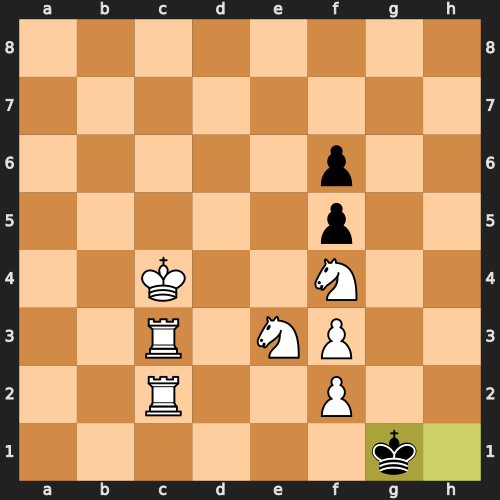

KeyboardInterrupt: 

In [ ]:
chess_problem_test_game = Game.Game(make_move_minimax, make_move_alphabeta, endgame_tablebase_dir=None)
chess_problem_test_game.play(chess_problem='EK')

In the following, a normal chess game is initialized and played using the minimax search and alpha-beta pruning algorithms. This is a more complex tests as a whole game of chess is played rather than only a partial game, as was the case in the chess problem test above.

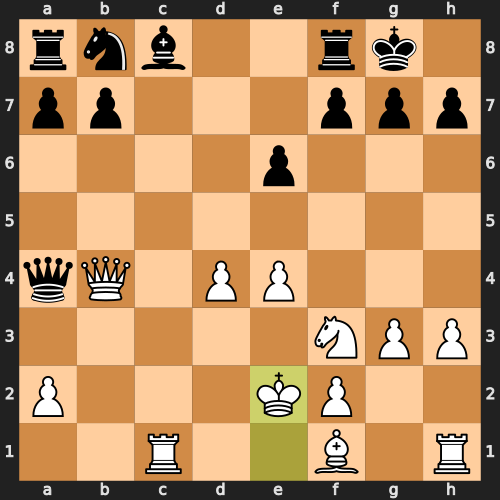

KeyboardInterrupt: 

In [ ]:
normal_game = Game.Game(
    make_move_algorithm_white=make_move_minimax, 
    make_move_algorithm_black=make_move_alphabeta
)

normal_game.play()

___

#### perform_chess_problem_tests
Runs the alpha-beta pruning algorithm against all available chess problems in order to test the functionality and effeciveness of this algorithm.

###### __<u>Arguments</u>__
__use_endgame_library__ _(bool)_ : Whether or not the endgame library can be used in the tests.  
__search_depth_auto__ _(bool)_ : Whether or not the maximum search depth of the alpha-beta pruning algorithm should be set to the minimum amount of moves the chess problem takes to solve. In theory, setting this to True should always yield an optimal solution.

###### __<u>Side effects</u>__
- The current visual output is overwritten.
- All defined tests are run.
- Test playthrough information is tracked and printed.

In [2]:
def perform_chess_problem_tests(use_endgame_library: bool, search_depth_auto: bool) -> None:
    if use_endgame_library:
        test_game = Game.Game(make_move_alphabeta, make_move_alphabeta)
    else:
        test_game = Game.Game(make_move_alphabeta, make_move_alphabeta, endgame_tablebase_dir=None)

    for c in Globals.CHESS_PROBLEMS:
        test_game.play(chess_problem=c, search_depth_auto=search_depth_auto, automation=True)

    pprint.pprint(test_game.problem_playthroughs)
    print(f'\n{test_game.wins}')

First, we test the search algorithm without an endgame tablebase. The search depth is the default value (3), therefore more complex chess problems are unlikely to be solved in the fewest possible moves.


In [ ]:
perform_chess_problem_tests(use_endgame_library=False, search_depth_auto=False)

Next, we test the search algorithm without an endgame tablebase, but with a search depth that's theoretically enough to solve the chess problem perfectly. This is simply the amount of moves that the chess problem takes to solve at minimum, because looking that many moves into the future should tell the algorithm how to reach a checkmate scenario.


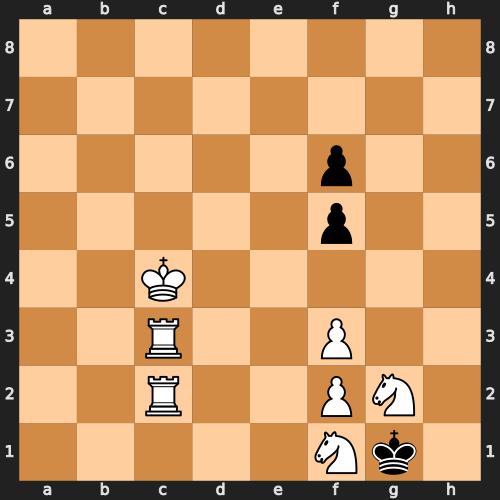

KeyboardInterrupt: 

In [3]:
perform_chess_problem_tests(use_endgame_library=False, search_depth_auto=True)

Lastly, we test the search algorithm with an endgame tablebase, in order to test if this tablebase is incorporated into the search function correctly. The search depth is set to the minimum move count to solve the problem, in order to see if the endgame tablebase is triggered at any point during an "intended" solution.

In [ ]:
perform_chess_problem_tests(use_endgame_library=True, search_depth_auto=True)

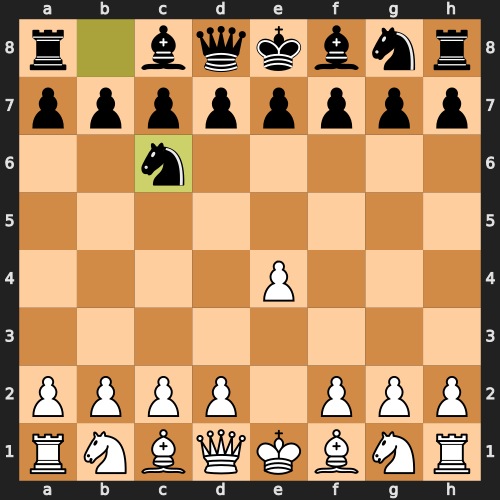

i('h1g1'), 0), (Move.from_uci('h1f1'), 0), (Move.from_uci('e1e2'), 0), (Move.from_uci('e1f1'), 0), (Move.from_uci('d1h5'), 0), (Move.from_uci('d1g4'), 0), (Move.from_uci('d1f3'), 0), (Move.from_uci('d1e2'), 0), (Move.from_uci('b1c3'), 0), (Move.from_uci('b1a3'), 0), (Move.from_uci('e1g1'), 0), (Move.from_uci('e4e5'), 0), (Move.from_uci('g2g3'), 0), (Move.from_uci('f2f3'), 0), (Move.from_uci('d2d3'), 0), (Move.from_uci('c2c3'), 0), (Move.from_uci('b2b3'), 0), (Move.from_uci('a2a3'), 0), (Move.from_uci('g2g4'), 0), (Move.from_uci('f2f4'), 0), (Move.from_uci('d2d4'), 0), (Move.from_uci('b2b4'), 0), (Move.from_uci('a2a4'), 0)]
Moves: <LegalMoveGenerator at 0x7fc1f1599e50 (Ba6, Bxd5, Bb5, Bd3, Bb3, Be2, Bf1, Ng5, Nf4, Ng1, Rg1, Rf1, Ke2, Kf1, Qh5, Qg4, Qf3, Qe2, Nc3, Na3, O-O, exd5, e5, g3, f3, d3, c3, b3, a3, g4, f4, d4, b4, a4)>, sorted: [(Move.from_uci('c4a6'), 0), (Move.from_uci('c4d5'), 0), (Move.from_uci('c4b5'), 0), (Move.from_uci('c4d3'), 0), (Move.from_uci('c4b3'), 0), (Move.from_u

KeyboardInterrupt: 

In [ ]:
test = Game.Game(make_move_alphabeta_progressive_deepening, make_move_alphabeta_progressive_deepening, 5, 5, opening_book=None, endgame_tablebase_dir=None)
test.play()

#### perform_full_game_test
This is a full game test. Therefore a full game of chess is played by two AIs instead of a single chess problem. The game is defined through the arguments below.

###### __<u>Arguments</u>__
__make_move_white__       _(Callable)_  : The function that the AI controlling the white pieces should use to make a new move.  
__algo_name_white__       _(str)_       : The name of the algorithm that the white AI uses.  
__make_move_black__       _(Callable)_  : The function that the AI controlling the black pieces should use to make a new move.  
__algo_name_black__       _(str)_       : The name of the algorithm that the black AI uses.  
__use_opening_book__      _(bool)_      : Whether or not an opening book should be used in the test.  
__use_endgame_tablebase__ _(bool)_      : Whether or not an endgame tablebase should be used in the test.  

###### __<u>Side effects</u>__
- The current visual output is overwritten.
- The defined game of chess is played.
- Test information is tracked and printed.
- Information about the move times is calculated and displayed.

###### __<u>Returns _(Game.Game)_</u>__
The Game object of the game of chess that has been played.

In [ ]:
def perform_full_game_test(
    make_move_white: Callable,
    algo_name_white: str,
    make_move_black: Callable,
    algo_name_black: str,
    use_opening_book: bool,
    use_endgame_tablebase: bool
) -> Game.Game:

    params = {}
    if not use_opening_book: params['opening_book'] = None
    if not use_endgame_tablebase: params['endgame_tablebase_dir'] = None
    game = Game.Game(make_move_white, make_move_black, **params)

    game.play()

    white_times_mean = np.mean(game.move_times[chess.WHITE])
    white_times_std = np.std(game.move_times[chess.WHITE])
    black_times_mean = np.mean(game.move_times[chess.BLACK])
    black_times_std = np.std(game.move_times[chess.BLACK])
    print(f'{algo_name_white} (white) move times. Mean: {white_times_mean}, std. dev: {white_times_std}')
    print(f'{algo_name_black} (black) move times. Mean: {black_times_mean}, std. dev: {black_times_std}')

---
In the following, every AI plays against every AI (but not against itself). Each combination is tested with only an opening book, only an endgame tablebase and neither. This is done to retrieve various pieces of useful information:
- If the algorithms function as intended. If a test ends in an unpredicted manner, it may be a sign that at least one of the involved algorithms is defective.
- Which algorithm can make the most effective moves. In theory, every search algorithm should be equally effective, whereas the random algorithm is inferior.
- Which algorithm can find moves the quickest. This is only applicable to search algorithms. In theory, alpha-beta pruning should be faster than minimax search. 
- How effective memoization is in a minimax search (and by extension in other searches).
- How effective opening books are at speeding up search algorithms.
- How effective endgame tablebases are at speeding up search algorithms.

First, the different tests are defined.  After that, each cell contains one test, so the output for each test is not overwritten by the output of the following test.

___

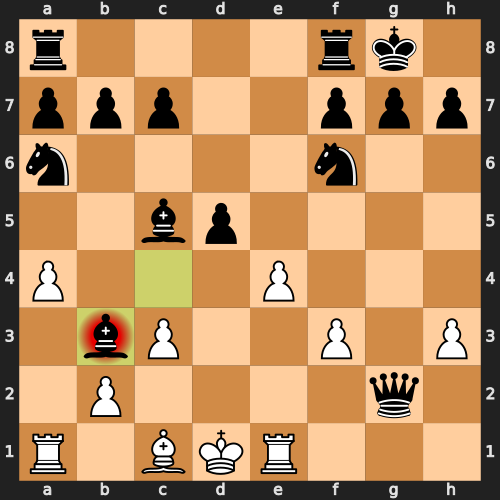

The game has ended. Black is the winner!

Outcome(termination=<Termination.CHECKMATE: 1>, winner=False)
Random (white) move times. Mean: 1.001100740934673, std. dev: 0.00030682449642354434
Minimax (black) move times. Mean: 2.5293119079188298, std. dev: 1.6724358703788162


In [ ]:
game_random_minimax = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_minimax,
    algo_name_black='Minimax',
    use_opening_book=False,
    use_endgame_tablebase=False
)

In [ ]:
game_random_minimax_opening = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_minimax,
    algo_name_black='Minimax',
    use_opening_book=True,
    use_endgame_tablebase=False
)

In [ ]:
game_random_minimax_endgame = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_minimax,
    algo_name_black='Minimax',
    use_opening_book=False,
    use_endgame_tablebase=True
)

___

In [ ]:
game_random_minimemo = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_minimax_memoization,
    algo_name_black='Minimax with memoization',
    use_opening_book=False,
    use_endgame_tablebase=False
)

In [ ]:
game_random_minimemo_opening = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_minimax_memoization,
    algo_name_black='Minimax with memoization',
    use_opening_book=True,
    use_endgame_tablebase=False
)

In [ ]:
game_random_minimemo_endgame = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_minimax_memoization,
    algo_name_black='Minimax with memoization',
    use_opening_book=False,
    use_endgame_tablebase=True
)

___

In [ ]:
game_minimax_minimemo = perform_full_game_test(
    make_move_white=make_move_minimax,
    algo_name_white='Minimax',
    make_move_black=make_move_minimax_memoization,
    algo_name_black='Minimax with memoization',
    use_opening_book=False,
    use_endgame_tablebase=False
)

In [ ]:
game_minimax_minimemo_opening = perform_full_game_test(
    make_move_white=make_move_minimax,
    algo_name_white='Minimax',
    make_move_black=make_move_minimax_memoization,
    algo_name_black='Minimax with memoization',
    use_opening_book=True,
    use_endgame_tablebase=False
)

In [ ]:
game_minimax_minimemo_endgame = perform_full_game_test(
    make_move_white=make_move_minimax,
    algo_name_white='Minimax',
    make_move_black=make_move_minimax_memoization,
    algo_name_black='Minimax with memoization',
    use_opening_book=False,
    use_endgame_tablebase=True
)

___


In [ ]:
game_random_alphabeta = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=False,
    use_endgame_tablebase=False
)

In [ ]:
game_random_alphabeta_opening = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=True,
    use_endgame_tablebase=False
)

In [ ]:
game_random_alphabeta_endgame = perform_full_game_test(
    make_move_white=make_random_move,
    algo_name_white='Random',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=False,
    use_endgame_tablebase=True
)

___

In [ ]:
game_minimax_alphabeta = perform_full_game_test(
    make_move_white=make_move_minimax,
    algo_name_white='Minimax',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=False,
    use_endgame_tablebase=False
)

In [ ]:
game_minimax_alphabeta_opening = perform_full_game_test(
    make_move_white=make_move_minimax,
    algo_name_white='Minimax',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=True,
    use_endgame_tablebase=False
)

In [ ]:
game_minimax_alphabeta_endgame = perform_full_game_test(
    make_move_white=make_move_minimax,
    algo_name_white='Minimax',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=False,
    use_endgame_tablebase=True
)

___

In [ ]:
game_minimemo_alphabeta = perform_full_game_test(
    make_move_white=make_move_minimax_memoization,
    algo_name_white='Minimax with memoization',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=False,
    use_endgame_tablebase=False
)

In [ ]:
game_minimemo_alphabeta_opening = perform_full_game_test(
    make_move_white=make_move_minimax_memoization,
    algo_name_white='Minimax with memoization',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=True,
    use_endgame_tablebase=False
)

In [ ]:
game_minimemo_alphabeta_endgame = perform_full_game_test(
    make_move_white=make_move_minimax_memoization,
    algo_name_white='Minimax with memoization',
    make_move_black=make_move_alphabeta,
    algo_name_black='Alpha-beta',
    use_opening_book=False,
    use_endgame_tablebase=True
)

In [ ]:
testGame = Game.Game(make_move_alphabeta)

OSError: not a directory: '/work/ChessAI_Implementation/Resources/Gaviota'

In [ ]:
testGame.play()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ce9acd-52c5-4422-904d-8424da19408b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>